In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Electricity_Theft_Data.csv to Electricity_Theft_Data.csv


In [ ]:
import pandas as pd
data = pd.read_csv('Electricity_Theft_Data.csv')
print(data.head())

        CONS_NO  01-01-15  02-01-15  03-01-15  04-01-15  05-01-15  06-01-15  \
0           NaN      1.00      2.00      3.00      4.00      5.00      6.00   
1  8.546920e+09      0.00      0.00      0.00      0.00      0.00      0.00   
2  6.177183e+08      1.12      1.73      3.34      2.77      3.50      2.86   
3  7.222500e+09       NaN       NaN       NaN       NaN       NaN       NaN   
4  7.134080e+09      1.58      3.65      2.54      4.28      1.62      1.39   

   07-01-15  08-01-15  09-01-15  ...  23-12-15  24-12-15  25-12-15  26-12-15  \
0      7.00      8.00      9.00  ...    357.00    358.00    359.00    360.00   
1      0.00      0.00      0.00  ...      0.00      0.00      0.00      0.00   
2      1.25      1.12      1.51  ...     17.31     15.95     17.00     32.05   
3       NaN       NaN       NaN  ...      0.00      0.00      0.00      0.00   
4      2.33      1.78      1.80  ...      4.17      7.95      8.84      2.20   

   27-12-15  28-12-15  29-12-15  30-12-15  3

In [ ]:
data.shape
data.head(5)

,CONS_NO,01-01-15,02-01-15,03-01-15,04-01-15,05-01-15,06-01-15,07-01-15,08-01-15,09-01-15,...,23-12-15,24-12-15,25-12-15,26-12-15,27-12-15,28-12-15,29-12-15,30-12-15,31-12-15,CHK_STATE
0,NaN,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,357.00,358.00,359.00,360.00,361.00,362.00,363.00,364.00,365.00,NaN
1,8.546920e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,6.177183e+08,1.12,1.73,3.34,2.77,3.50,2.86,1.25,1.12,1.51,...,17.31,15.95,17.00,32.05,28.72,31.11,28.47,16.70,14.96,1.0
3,7.222500e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,7.134080e+09,1.58,3.65,2.54,4.28,1.62,1.39,2.33,1.78,1.80,...,4.17,7.95,8.84,2.20,2.91,10.52,7.98,3.68,1.41,1.0


In [ ]:
data.isnull().sum()

,0
CONS_NO,1
01-01-15,1602
02-01-15,1602
03-01-15,1602
04-01-15,1601
...,...
28-12-15,10
29-12-15,7
30-12-15,7
31-12-15,2


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

knn_imputer = KNNImputer(n_neighbors=5)

data1 = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
print(data1.head())

In [ ]:
import pandas as pd
import numpy as np
# Fill missing values with the mean of each column
data1 = data.fillna(data.median())

print("\nDataFrame after filling missing values with mean:")
print(data1)


DataFrame after filling missing values with mean:
           CONS_NO  01-01-15  02-01-15  03-01-15  04-01-15  05-01-15  \
0     5.024342e+09      1.00      2.00     3.000     4.000      5.00   
1     8.546920e+09      0.00      0.00     0.000     0.000      0.00   
2     6.177183e+08      1.12      1.73     3.340     2.770      3.50   
3     7.222500e+09      4.23      4.29     4.350     4.130      4.22   
4     7.134080e+09      1.58      3.65     2.540     4.280      1.62   
...            ...       ...       ...       ...       ...       ...   
9952  6.460203e+09      3.46      2.83     3.735     3.735      2.65   
9953  3.721000e+08      8.39      6.49     5.340     7.280      5.55   
9954  1.069130e+09     11.33      3.47     4.370     7.370      5.76   
9955  5.571700e+09     13.80     11.22    13.170    10.880     13.52   
9956  1.635009e+09      4.21      3.90     3.930     5.000      5.00   

      06-01-15  07-01-15  08-01-15  09-01-15  ...  23-12-15  24-12-15  \
0         6

In [ ]:
data1.isnull().sum()

,0
CONS_NO,0
01-01-15,0
02-01-15,0
03-01-15,0
04-01-15,0
...,...
28-12-15,0
29-12-15,0
30-12-15,0
31-12-15,0


1.

In [ ]:
import pandas as pd
import numpy as np

# Drop 'CONS_NO' if it's present (assuming it's a consumer ID)
if 'CONS_NO' in data1.columns:
    data1 = data1.drop(columns=['CONS_NO'])

# Step 1: Daily consumption - The original columns represent daily patterns
X_daily = data1.copy()  # Copying all daily data as is

# Step 2: Weekly patterns - Average consumption over every 7 days
# Assuming that each column corresponds to one day, we can group every 7 columns to create weekly patterns.
weekly_data = data1.groupby(np.arange(data1.shape[1]) // 7, axis=1).mean()
weekly_data.columns = [f"Week_{i+1}" for i in range(weekly_data.shape[1])]

# Step 3: Monthly patterns - Aggregate data for approximately 30 days
# Since months vary in length, you can approximate a month as 30 days, or group manually by month if date information is available.
monthly_data = data1.groupby(np.arange(data1.shape[1]) // 30, axis=1).mean()  # 30-day average
monthly_data.columns = [f"Month_{i+1}" for i in range(monthly_data.shape[1])]

# Step 4: Seasonal trends - Group data by seasons (e.g., 3 months per season)
# If we consider a season as a 3-month (90-day) period, group every 90 days for seasonal trends.
seasonal_data = data1.groupby(np.arange(data1.shape[1]) // 90, axis=1).mean()
seasonal_data.columns = [f"Season_{i+1}" for i in range(seasonal_data.shape[1])]

# Display the first few rows of each view
print("Daily Consumption (first 5 rows):")
print(X_daily.head())

print("\nWeekly Patterns (first 5 rows):")
print(weekly_data.head())

print("\nMonthly Patterns (first 5 rows):")
print(monthly_data.head())

print("\nSeasonal Trends (first 5 rows):")
print(seasonal_data.head())

Daily Consumption (first 5 rows):
   01-01-15  02-01-15  03-01-15  04-01-15  05-01-15  06-01-15  07-01-15  \
0      1.00      2.00      3.00      4.00      5.00      6.00      7.00   
1      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2      1.12      1.73      3.34      2.77      3.50      2.86      1.25   
3      4.23      4.29      4.35      4.13      4.22      4.10      4.15   
4      1.58      3.65      2.54      4.28      1.62      1.39      2.33   

   08-01-15  09-01-15  10-01-15  ...  23-12-15  24-12-15  25-12-15  26-12-15  \
0      8.00      9.00     10.00  ...    357.00    358.00    359.00    360.00   
1      0.00      0.00      0.00  ...      0.00      0.00      0.00      0.00   
2      1.12      1.51      1.69  ...     17.31     15.95     17.00     32.05   
3      4.06      4.16      4.27  ...      0.00      0.00      0.00      0.00   
4      1.78      1.80      2.96  ...      4.17      7.95      8.84      2.20   

   27-12-15  28-12-15  29-12-15  3

<ipython-input-7-8d644847febf>:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  weekly_data = data1.groupby(np.arange(data1.shape[1]) // 7, axis=1).mean()
<ipython-input-7-8d644847febf>:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_data = data1.groupby(np.arange(data1.shape[1]) // 30, axis=1).mean()  # 30-day average
<ipython-input-7-8d644847febf>:23: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  seasonal_data = data1.groupby(np.arange(data1.shape[1]) // 90, axis=1).mean()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Step 5: Scaling the views
X_daily_scaled = pd.DataFrame(scaler.fit_transform(X_daily), columns=X_daily.columns)
weekly_data_scaled = pd.DataFrame(scaler.fit_transform(weekly_data), columns=weekly_data.columns)
monthly_data_scaled = pd.DataFrame(scaler.fit_transform(monthly_data), columns=monthly_data.columns)
seasonal_data_scaled = pd.DataFrame(scaler.fit_transform(seasonal_data), columns=seasonal_data.columns)

# Display the first few rows of each scaled view
print("Scaled Daily Consumption (first 5 rows):")
print(X_daily_scaled.head())

print("\nScaled Weekly Patterns (first 5 rows):")
print(weekly_data_scaled.head())

print("\nScaled Monthly Patterns (first 5 rows):")
print(monthly_data_scaled.head())

print("\nScaled Seasonal Trends (first 5 rows):")
print(seasonal_data_scaled.head())

Scaled Daily Consumption (first 5 rows):
   01-01-15  02-01-15  03-01-15  04-01-15  05-01-15  06-01-15  07-01-15  \
0 -0.491218 -0.409929 -0.319139 -0.200698 -0.104181 -0.004984  0.027709   
1 -0.584457 -0.600025 -0.597078 -0.568334 -0.557818 -0.532667 -0.115895   
2 -0.480029 -0.435592 -0.287639 -0.313746 -0.240272 -0.281138 -0.090251   
3 -0.190053 -0.192270 -0.194067 -0.188750 -0.174949 -0.172084 -0.030758   
4 -0.437139 -0.253100 -0.361756 -0.174964 -0.410840 -0.410421 -0.068095   

   08-01-15  09-01-15  10-01-15  ...   23-12-15  24-12-15  25-12-15  26-12-15  \
0  0.028457  0.261908  0.275209  ...  11.873430  6.151587  5.703951  3.943807   
1 -0.136033 -0.577767 -0.481414  ...  -0.253607 -0.116486 -0.109163 -0.068587   
2 -0.113004 -0.436888 -0.353545  ...   0.334402  0.162776  0.166109  0.288627   
3 -0.052554 -0.189651 -0.158336  ...  -0.253607 -0.116486 -0.109163 -0.068587   
4 -0.099434 -0.409832 -0.257454  ...  -0.111955  0.022707  0.033978 -0.044067   

   27-12-15  28-12-15

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Separate the target variable
y = data1['CHK_STATE']
X = data1.drop(columns=['CHK_STATE'])

# Step 1: Daily consumption - The original columns represent daily patterns
X_daily = X.copy()

# Step 1: Label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Train-test split (for each view)
X_daily_train, X_daily_test, y_train, y_test = train_test_split(X_daily_scaled, y_encoded, test_size=0.2, random_state=42)
X_weekly_train, X_weekly_test, _, _ = train_test_split(weekly_data_scaled, y_encoded, test_size=0.2, random_state=42)
X_monthly_train, X_monthly_test, _, _ = train_test_split(monthly_data_scaled, y_encoded, test_size=0.2, random_state=42)
X_seasonal_train, X_seasonal_test, _, _ = train_test_split(seasonal_data_scaled, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets for each view
print("Daily view - Train:", X_daily_train.shape, "Test:", X_daily_test.shape)
print("Weekly view - Train:", X_weekly_train.shape, "Test:", X_weekly_test.shape)
print("Monthly view - Train:", X_monthly_train.shape, "Test:", X_monthly_test.shape)
print("Seasonal view - Train:", X_seasonal_train.shape, "Test:", X_seasonal_test.shape)

Daily view - Train: (7965, 366) Test: (1992, 366)
Weekly view - Train: (7965, 53) Test: (1992, 53)
Monthly view - Train: (7965, 13) Test: (1992, 13)
Seasonal view - Train: (7965, 5) Test: (1992, 5)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # For handling missing values

# Initialize individual models
# Model 1: Logistic Regression on Daily Data
model_daily = LogisticRegression(max_iter=4000)  # Increase max_iter if needed
model_daily.fit(X_daily_train, y_train)

# Model 2: Random Forest on Weekly Data
model_weekly = RandomForestClassifier()
model_weekly.fit(X_weekly_train, y_train)

# Model 3: SVM on Monthly Data
model_monthly = SVC(probability=True)
model_monthly.fit(X_monthly_train, y_train)

# Model 4: Gradient Boosting on Seasonal Data
model_seasonal = GradientBoostingClassifier()
model_seasonal.fit(X_seasonal_train, y_train)

# Step 9: Ensemble with VotingClassifier (Soft Voting)
ensemble = VotingClassifier(
    estimators=[
        ('daily', model_daily),
        ('weekly', model_weekly),
        ('monthly', model_monthly),
        ('seasonal', model_seasonal)
    ],
    voting='soft'
)

# Combine all views (daily, weekly, monthly, seasonal)
X_train_combined = np.hstack([X_daily_train, X_weekly_train, X_monthly_train, X_seasonal_train])
X_test_combined = np.hstack([X_daily_test, X_weekly_test, X_monthly_test, X_seasonal_test])

# Train the ensemble on combined views
ensemble.fit(X_train_combined, y_train)

# Step 10: Evaluate the ensemble
y_pred = ensemble.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 0.9994979919678715


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Ensemble Model Accuracy: 0.9994979919678715
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1703
           1       1.00      1.00      1.00       289

    accuracy                           1.00      1992
   macro avg       1.00      1.00      1.00      1992
weighted avg       1.00      1.00      1.00      1992



**Hybrid methods:**

Removing Class Imbalance

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Removing imbalance with ADASYN and Tomek

In [ ]:
if 'CONS_NO' in data1.columns:
    data1 = data1.drop(columns=['CONS_NO'])

X = data1.drop(columns=['CHK_STATE'])
y = data1['CHK_STATE']

# Step 2: Label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Step 3: Apply ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y_encoded)

# Step 4: Apply Tomek Links to remove borderline noise
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_resampled_adasyn, y_resampled_adasyn)

In [ ]:
# Step 5: Create views (Daily, Weekly, Monthly, Seasonal) from the resampled dataset
# We assume daily is the raw data, and for Weekly, Monthly, Seasonal we calculate averages

# Daily view
X_daily = X_resampled

# Weekly, Monthly, and Seasonal views
weekly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 7, axis=1).mean()
monthly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 30, axis=1).mean()
seasonal_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 90, axis=1).mean()

# Step 6: Standardize each view
scaler = StandardScaler()
X_daily_scaled = pd.DataFrame(scaler.fit_transform(X_daily))
weekly_data_scaled = pd.DataFrame(scaler.fit_transform(weekly_data))
monthly_data_scaled = pd.DataFrame(scaler.fit_transform(monthly_data))
seasonal_data_scaled = pd.DataFrame(scaler.fit_transform(seasonal_data))

# Step 7: Train-test split for each view after resampling
X_train_daily, X_test_daily, y_train, y_test = train_test_split(X_daily_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_weekly, X_test_weekly, _, _ = train_test_split(weekly_data_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_monthly, X_test_monthly, _, _ = train_test_split(monthly_data_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, _, _ = train_test_split(seasonal_data_scaled, y_resampled, test_size=0.2, random_state=42)

<ipython-input-12-b3b7e163f2ed>:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  weekly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 7, axis=1).mean()
<ipython-input-12-b3b7e163f2ed>:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 30, axis=1).mean()
<ipython-input-12-b3b7e163f2ed>:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  seasonal_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 90, axis=1).mean()


In [ ]:
# Step 8: Initialize and train individual models on their respective views
# Model 1: Logistic Regression (Daily View)
model_daily = LogisticRegression(max_iter=4000)
model_daily.fit(X_train_daily, y_train)

# Model 2: Random Forest (Weekly View)
model_weekly = RandomForestClassifier()
model_weekly.fit(X_train_weekly, y_train)

# Model 3: SVM (Monthly View)
model_monthly = SVC(probability=True)
model_monthly.fit(X_train_monthly, y_train)

# Model 4: Gradient Boosting (Seasonal View)
model_seasonal = GradientBoostingClassifier()
model_seasonal.fit(X_train_seasonal, y_train)

# Step 9: Ensemble using VotingClassifier (Soft Voting)
ensemble = VotingClassifier(
    estimators=[
        ('daily', model_daily),
        ('weekly', model_weekly),
        ('monthly', model_monthly),
        ('seasonal', model_seasonal)
    ],
    voting='soft'
)

# Train the ensemble using one of the views (Daily in this case) or combine predictions later
ensemble.fit(X_train_daily, y_train)

# Step 10: Evaluate the ensemble on the daily view's test data
y_pred = ensemble.predict(X_test_daily)

In [ ]:
# Accuracy, classification report and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Ensemble Model Accuracy: 0.8682756615295144
Confusion Matrix:
[[1512  215]
 [ 238 1474]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1727
           1       0.87      0.86      0.87      1712

    accuracy                           0.87      3439
   macro avg       0.87      0.87      0.87      3439
weighted avg       0.87      0.87      0.87      3439



Increasing Accuracy by using powerful classifiers

In [ ]:
# Step 5: Create views (Daily, Weekly, Monthly, Seasonal) from the resampled dataset
# We assume daily is the raw data, and for Weekly, Monthly, Seasonal we calculate averages

# Daily view
X_daily = X_resampled

# Weekly, Monthly, and Seasonal views
weekly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 7, axis=1).mean()
monthly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 30, axis=1).mean()
seasonal_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 90, axis=1).mean()

# Step 6: Standardize each view
scaler = StandardScaler()
X_daily_scaled = pd.DataFrame(scaler.fit_transform(X_daily))
weekly_data_scaled = pd.DataFrame(scaler.fit_transform(weekly_data))
monthly_data_scaled = pd.DataFrame(scaler.fit_transform(monthly_data))
seasonal_data_scaled = pd.DataFrame(scaler.fit_transform(seasonal_data))

<ipython-input-13-3af7abf1284c>:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  weekly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 7, axis=1).mean()
<ipython-input-13-3af7abf1284c>:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 30, axis=1).mean()
<ipython-input-13-3af7abf1284c>:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  seasonal_data = pd.DataFrame(X_resampled).groupby(np.arange(X_resampled.shape[1]) // 90, axis=1).mean()


In [ ]:
# Step 7: Train-test split for each view after resampling
X_train_daily, X_test_daily, y_train, y_test = train_test_split(X_daily_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_weekly, X_test_weekly, _, _ = train_test_split(weekly_data_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_monthly, X_test_monthly, _, _ = train_test_split(monthly_data_scaled, y_resampled, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, _, _ = train_test_split(seasonal_data_scaled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Step 8: Initialize and train individual models on their respective views
# Model 1: XGBoost (Daily View)
model_daily = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model_daily.fit(X_train_daily, y_train)

# Model 2: Random Forest (Weekly View) - increased estimators and depth for better accuracy
model_weekly = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model_weekly.fit(X_train_weekly, y_train)

# Model 3: SVM (Monthly View)
model_monthly = SVC(probability=True)
model_monthly.fit(X_train_monthly, y_train)

# Model 4: Gradient Boosting (Seasonal View) - increased estimators and reduced learning rate for better accuracy
model_seasonal = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model_seasonal.fit(X_train_seasonal, y_train)

# Step 9: Ensemble using VotingClassifier (Soft Voting)
ensemble = VotingClassifier(
    estimators=[
        ('xgb', model_daily),
        ('rf', model_weekly),
        ('svc', model_monthly),
        ('gb', model_seasonal)
    ],
    voting='soft'
)

# Train the ensemble using one of the views (Daily in this case) or combine predictions later
ensemble.fit(X_train_daily, y_train)

# Step 10: Evaluate the ensemble on the daily view's test data
y_pred = ensemble.predict(X_test_daily)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:38:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Accuracy, classification report and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Ensemble Model Accuracy: 0.9415527769700495
Confusion Matrix:
[[1593  134]
 [  67 1645]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1727
           1       0.92      0.96      0.94      1712

    accuracy                           0.94      3439
   macro avg       0.94      0.94      0.94      3439
weighted avg       0.94      0.94      0.94      3439



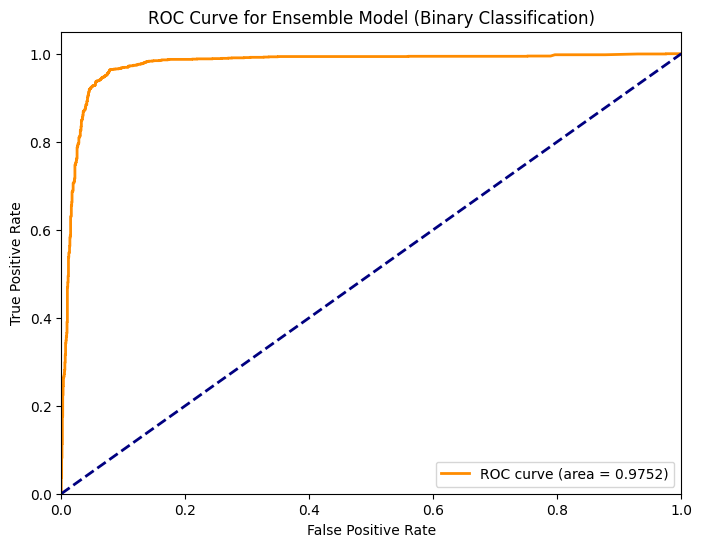

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_score = ensemble.predict_proba(X_test_daily)[:, 1]  # Probability for class 1

# Compute ROC curve and ROC area for class 1
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Model (Binary Classification)')
plt.legend(loc="lower right")
plt.show()